In [15]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [16]:
# Read in Texas shapefile and view headers
states_gdf = gpd.read_file("C:/Users/mcluck/Desktop/geo_map/gis_data/tl_2012_us_state.shp")
states_gdf.columns

Index(['OBJECTID', 'REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID',
       'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [17]:
# Explore data further
states_gdf.head()

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,1.663425e+10,1.167874e+10,+19.8097670,-155.5061027,2.419034e+06,3.268482e+10,"MULTIPOLYGON (((-17361760.204 2164544.588, -17..."
1,2,3,7,05,00068085,05,AR,Arkansas,00,G4000,A,1.347726e+11,2.959210e+09,+34.8955256,-092.4446262,2.656648e+06,2.053261e+11,"POLYGON ((-10515267.713 4101325.818, -10515269..."
2,3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,3.141611e+11,7.564385e+08,+34.4346843,-106.1316181,2.900368e+06,4.643927e+11,"POLYGON ((-12138963.727 4106855.17, -12138964...."
3,4,4,8,30,00767982,30,MT,Montana,00,G4000,A,3.769636e+11,3.868565e+09,+47.0511771,-109.6348174,4.607246e+06,8.201836e+11,"POLYGON ((-12727480.235 5886876.586, -12727567..."
4,5,1,2,36,01779796,36,NY,New York,00,G4000,A,1.220579e+11,1.923885e+10,+42.9133974,-075.5962723,3.212630e+06,2.637702e+11,"MULTIPOLYGON (((-8866092.533 5160809.769, -886..."


<Axes: >

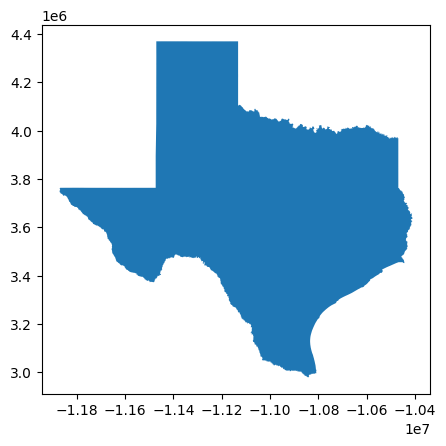

In [18]:
tx_gdf = states_gdf[states_gdf["STUSPS"] == "TX"]
tx_gdf.head()
tx_gdf.plot()

In [19]:
# Read in Texas cities csv and explore
tx_cities_df = pd.read_csv("C:/Users/mcluck/Desktop/geo_map/gis_data/tx_cities.csv")
tx_cities_df.head()

,name,name_ascii,type,county_fips,state_id,state_name,lat,lng,population
0,Zuehl,Zuehl,City,48187,TX,Texas,29.4960,-98.1535,375
1,Zephyr,Zephyr,City,48049,TX,Texas,31.6791,-98.7911,198
2,Zavalla,Zavalla,City,48005,TX,Texas,31.1584,-94.4180,690
3,Zarate,Zarate,City,48427,TX,Texas,26.3199,-98.6369,0
4,Zapata Ranch,Zapata Ranch,City,48489,TX,Texas,26.3570,-97.8243,225


<Axes: >

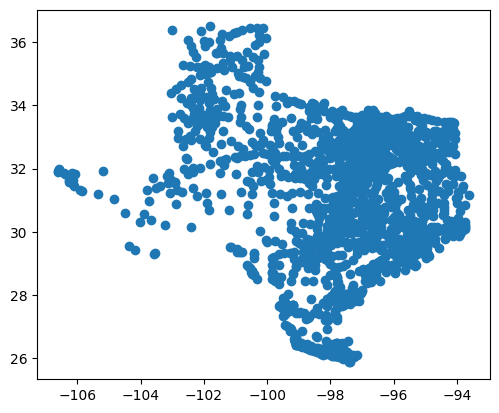

In [20]:
# Convert Texas cities to gdf
city_geometry = [Point(xy) for xy in zip(tx_cities_df['lng'], tx_cities_df['lat'])]
tx_cities_gdf = gpd.GeoDataFrame(tx_cities_df, geometry=city_geometry)
tx_cities_gdf.plot()

<Axes: >

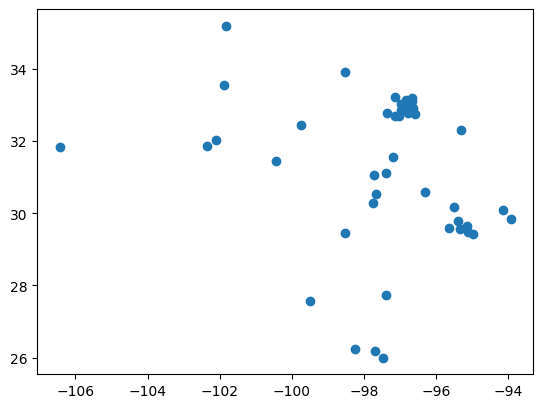

In [21]:
tx_cities_gdf_100k = tx_cities_gdf[tx_cities_gdf['population'] > 100000]
tx_cities_gdf_100k.plot()

<Axes: >

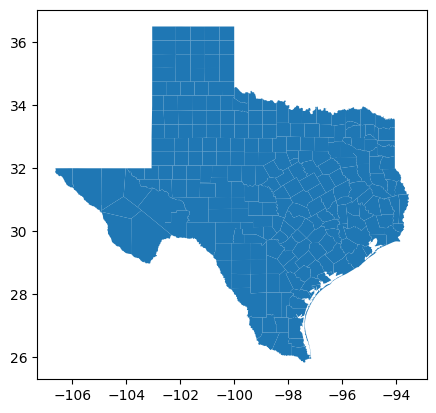

In [22]:
# Read in Texas subs shapefile, dissolve to new gdf based on COUNTY
texas_subs_gdf = gpd.read_file("C:/Users/mcluck/Desktop/geo_map/gis_data/Tx_CntyBndry_SubDivisions_CCD_TIGER500k.shp")
texas_counties_gdf = texas_subs_gdf.dissolve(by='COUNTY')
texas_counties_gdf.plot()

In [23]:
# Check projections
print("Counties: ", texas_counties_gdf.crs, "Cities: ", tx_cities_gdf_100k.crs, "State: ", tx_gdf.crs)

Counties:  EPSG:4326 Cities:  None State:  PROJCS["Popular Visualisation CRS / Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"]]


In [24]:
# Convert/set projections
tx_gdf_prj = tx_gdf.to_crs(epsg=4326)
texas_counties_gdf_prj = texas_counties_gdf.to_crs(epsg=4326)
tx_cities_gdf_100k_prj = tx_cities_gdf_100k.set_crs(epsg=4326)

In [25]:
# Check new projections
print("Counties: ", texas_counties_gdf_prj.crs, "Cities: ", tx_cities_gdf_100k_prj.crs, "State: ", tx_gdf_prj.crs)

Counties:  EPSG:4326 Cities:  EPSG:4326 State:  EPSG:4326


<Axes: >

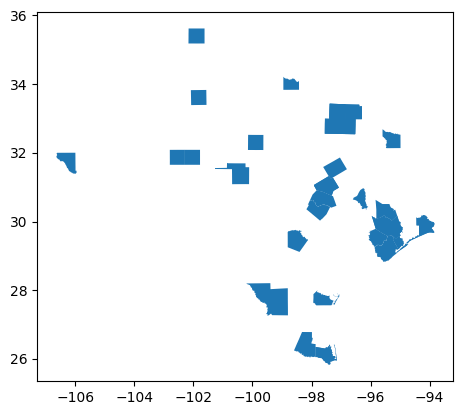

In [26]:
# Spatial join 100k cities and counties
counties_100k_prj = gpd.sjoin(texas_counties_gdf_prj, tx_cities_gdf_100k_prj, how="inner", predicate="intersects")
counties_100k_prj.plot()

Text(92.09722222222221, 0.5, 'Latitude')

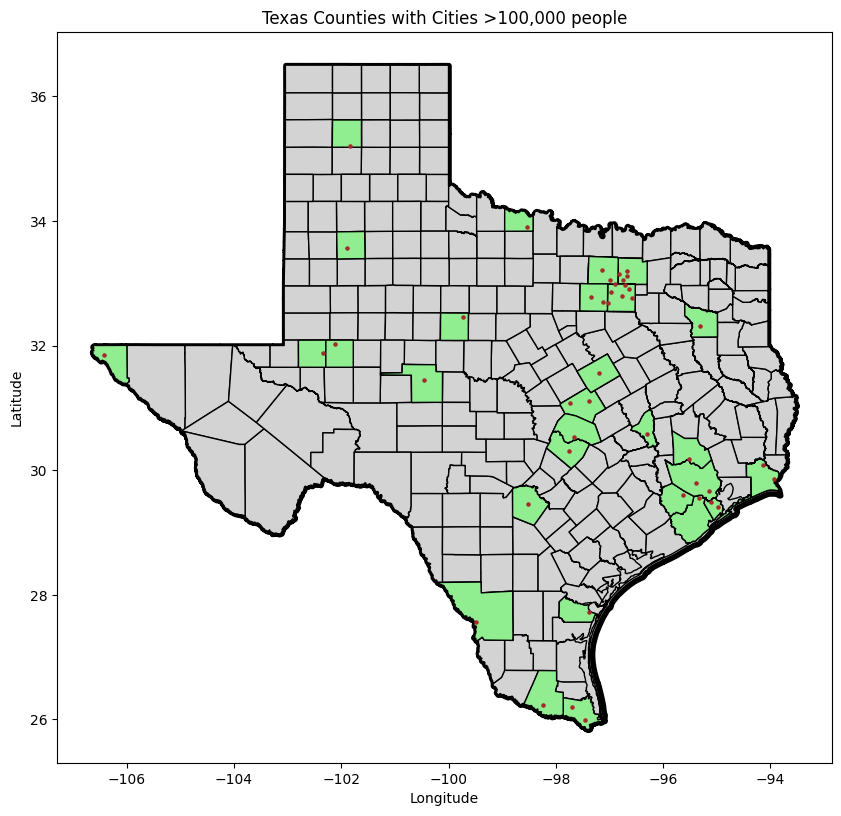

In [27]:
# Map all data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the state
tx_gdf_prj.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=4, label='Texas')

# Plot the counties
texas_counties_gdf_prj.plot(ax=ax, color='lightgrey', edgecolor='black', label='Counties')

# Plot the 100k counties
counties_100k_prj.plot(ax=ax, color='lightgreen', edgecolor='black', label='Counties >100k')

# Plot the cities
tx_cities_gdf_100k_prj.plot(ax=ax, color='brown', markersize=5, label='Cities >100k')

ax.set_title("Texas Counties with Cities >100,000 people")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

In [28]:
# Convert all gdf to geojson
tx_gdf_prj.to_file("gis_data/tx_state.geojson", driver="GeoJSON")
texas_counties_gdf_prj.to_file("gis_data/tx_counties.geojson", driver="GeoJSON")
tx_cities_gdf_100k_prj.to_file("gis_data/tx_cities_100k.geojson", driver="GeoJSON")
counties_100k_prj.to_file("gis_data/tx_counties_100k.geojson", driver="GeoJSON")